https://developers.arcgis.com/python/guide/visualizing-data-with-the-spatially-enabled-dataframe/

In [1]:
import pandas as pd
import geopandas as gpd
from arcgis import GIS, GeoAccessor, GeoSeriesAccessor
from arcgis.features import SpatialDataFrame

gis = GIS()

%matplotlib inline

In [2]:
#Get some data
sdfHUC12s = GeoAccessor.from_featureclass('./data/12Digit_HUC_Subwatersheds.shp')
sdfSites = GeoAccessor.from_featureclass('./data/DuplinSites_LL.shp')

In [3]:
sdfHUC12s.spatial.sr

{'wkid': 4326, 'latestWkid': 4326}

In [4]:
sdfSites.spatial.sr

{'wkid': 4269, 'latestWkid': 4269}

In [6]:
#Reproject points to same sr as polygons
sdfSites.spatial.project(sdfHUC12s.spatial.sr)
sdfSites.spatial.sr

{'wkid': 4326, 'latestWkid': 4326}

In [7]:
#Select the HUCs intersecting the points
sdfHUCs_select = sdfHUC12s.spatial.relationship(sdfSites,op='contains')

### Simple plotting
Steps: 
* Create a map (optionally zoomed into a set region)
* Plot your spatial dataframe onto the map

In [8]:
#Step1 : Create a map zoomed to Duplin Co
map1 = gis.map('Duplin Co., NC')
map1

MapView(layout=Layout(height='400px', width='100%'))

In [9]:
#Step 2: Plot the points GeoAccessor object onto the map
sdfSites.spatial.plot(map_widget = map1)

True

In [10]:
#Remove the previous plot and re-plot both the HUCs and the Points
map1.remove_layers()
sdfHUCs_select.spatial.plot(map1)
sdfSites.spatial.plot(map1)

True

### Controlling how features are displayed
* https://developers.arcgis.com/python/guide/visualizing-data-with-the-spatially-enabled-dataframe/#Understanding-renderers

In [11]:
#Add a column to the SDF sites classifying "Estimate" values as low, med, high
sdfSites.loc[sdfSites['Estimated']< 16,'Class'] = 'low'
sdfSites.loc[(sdfSites['Estimated'] >= 16) & 
             (sdfSites['Estimated'] < 26),'Class'] = 'med'
sdfSites.loc[sdfSites['Estimated']>= 26,'Class'] = 'high'

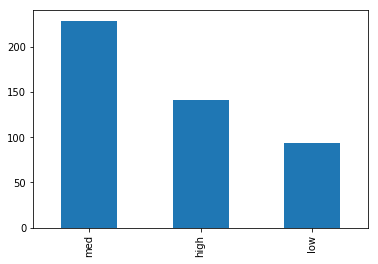

In [12]:
#Show tallies of each class
sdfSites.Class.value_counts().plot(kind='bar');

In [13]:
map2 = gis.map('Duplin Co., NC')
map2

MapView(layout=Layout(height='400px', width='100%'))

First, start with the example presented in the API Guide:
* https://developers.arcgis.com/python/guide/visualizing-data-with-the-spatially-enabled-dataframe/#Plotting-the-DataFrame

In [17]:
sdfSites.spatial.plot(map_widget=map2,
                      symbol_type='simple',
                      symbol_style='d', # d - for diamonds
                      colors='Reds_r',
                      cstep=10,
                      outline_color='Blues',
                      marker_size=10)

True

Now, play with the values to see what they do
* Change the symbol type to crosses, then to squares
* Add a `line_width` attribute, setting it's value to 0.01
* Change the cstep to 0, then to 100, 200: what happens as the value gets larger?

In [34]:
map2.remove_layers()
sdfSites.spatial.plot(map_widget=map2,
                      symbol_type='simple',
                      symbol_style='s', # d - for diamonds
                      colors='Reds_r',
                      cstep=150,
                      outline_color='Reds',
                      line_width=0.01,
                      marker_size='Estimate')

True

##### Renderers: 
https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=project#arcgis.features.GeoAccessor.plot
* Change the symbol type from default circles to squares
* Change render types from simple to:
    * unique values on our "Class" attribute
    * class break values on our "Estimate" 

In [65]:
map3 = gis.map('Duplin Co., NC',zoomlevel=8)
map3

MapView(layout=Layout(height='400px', width='100%'), zoom=8.0)

In [82]:
map3.remove_layers()
sdfSites.spatial.plot(map_widget = map3,
                      #renderer_type='u',col='Class', cmap='Blues',
                      renderer_type='c',col='Lat',cmap='Greens',alpha=0.2,
                      marker_size=2,
                      line_width=0.01
             )

True

* Change the renderer type to 'h'
* Change the renderer type to 'c' (class) hten 